In [1]:
!pip install stac.py

     |████████████████████████████████| 64 kB 798 kB/s eta 0:00:011
  Created wheel for stac.py: filename=stac.py-0.9.0.post4-py3-none-any.whl size=45576 sha256=ea8ba23603e2beb4c3a62a7fab224ca4b6aee840e7b75bb9aa2e8aa94e0d6004
  Stored in directory: /root/.cache/pip/wheels/dc/5e/02/b29abc269873a16cc665f295f9c75c42d61e0df9a4527b2c9a
Successfully built stac.py
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy
import rasterio
import stac

from math import floor, ceil
from matplotlib import pyplot as plt
from pyproj import Proj
from rasterio.windows import Window

def longlat2window(lon, lat, dataset):
    """
    Args:
        lon (tuple): Tuple of min and max lon
        lat (tuple): Tuple of min and max lat
        dataset: Rasterio dataset

    Returns:
        rasterio.windows.Window
    """
    p = Proj(dataset.crs)
    t = dataset.transform
    xmin, ymin = p(lon[0], lat[0])
    xmax, ymax = p(lon[1], lat[1])
    col_min, row_min = ~t * (xmin, ymin)
    col_max, row_max = ~t * (xmax, ymax)
    return Window.from_slices(rows=(floor(row_max), ceil(row_min)),
                              cols=(floor(col_min), ceil(col_max)))

In [3]:
st = stac.STAC('http://brazildatacube.dpi.inpe.br/stac/')

In [4]:
my_search = st.search({'collections':['CB4_64_16D_STK-1'], 
                       'bbox':'-46.62597656250001,-13.19716452328198,-45.03570556640626,-12.297068292853805',
                       'datetime':'2018-08-01/2019-02-28', 
                       'limit':30})
my_search

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,0.0,255.0,0.0,0.0001,uint8
CMASK,quality,0.0,4.0,255.0,0.0001,uint8
EVI,evi,0.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,0.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,0.0001,int16
TOTALOB,TotalOb,0.0,255.0,0.0,0.0001,uint8


In [5]:
nir_band_info = my_search['features'][0]['properties']['eo:bands'][3]
nir_band_info

{'name': 'BAND16',
 'common_name': 'nir',
 'description': None,
 'min': 0.0,
 'max': 10000.0,
 'nodata': -9999.0,
 'scale': 0.0001,
 'center_wavelength': None,
 'full_width_half_max': None,
 'data_type': 'int16'}

In [6]:
first_date_nir_url = my_search['features'][0]['assets']['BAND16']['href']
first_date_nir_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2019-02-18_2019-03-05/CB4_64_16D_STK_v001_022024_2019-02-18_2019-03-05_BAND16.tif'

In [7]:
last_date_nir_url = my_search['features'][13]['assets']['BAND16']['href']
last_date_nir_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-07-28_2018-08-12/CB4_64_16D_STK_v001_022024_2018-07-28_2018-08-12_BAND16.tif'

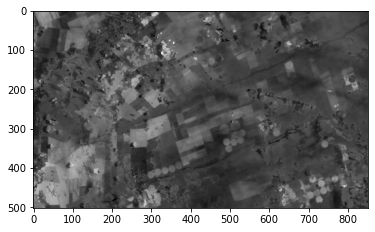

In [8]:
w = -45.90
n = -12.6
e = -45.40
s = -12.90

with rasterio.open(first_date_nir_url) as dataset:
    first_date_nir = dataset.read(1, window = longlat2window((w,e), (s,n), dataset))
    plt.imshow(first_date_nir, cmap='gray')
    plt.show()

Banda com núvem

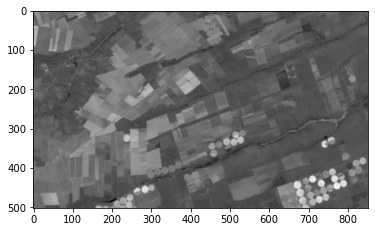

In [9]:
with rasterio.open(last_date_nir_url) as dataset:
    last_date_nir = dataset.read(1, window = longlat2window((w,e), (s,n), dataset))
    plt.imshow(last_date_nir, cmap='gray')
    plt.show()

sem núvem

In [11]:
nir_difference = last_date_nir - first_date_nir
nir_difference

array([[ -743, -1144, -1298, ...,   311,   419,   376],
       [ -739, -1046, -1296, ...,   302,   344,   407],
       [-1204, -1170, -1358, ...,   308,   238,   250],
       ...,
       [-1149,  -866,  -946, ...,   287,   136,  -163],
       [-1139, -1029, -1232, ...,  -215,   -91,   -27],
       [-1095,  -946, -1136, ...,   -49,  -248,  -318]], dtype=int16)

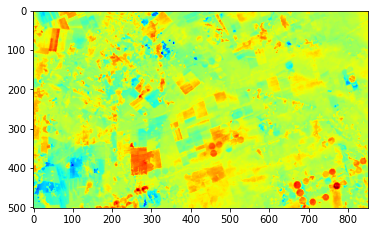

In [12]:
plt.imshow(nir_difference, cmap='jet')

* Região em vermelho: crescimento de vegetação (plantação) 
* Regiões mais homogeneas: vegetação mais estável (floresta)
* manchas: núvens que sumiram